# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
#!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     -------------------------------------- 675.6/675.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675976 sha256=13a7107e858c6b2958c35a5e7546350fe312263df86216d382af76ece09aceec
  Stored in directory: c:\users\jenn2\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
for city in cities:
    print(city)

Number of cities in the list: 615
adamstown
bethel
oranjemund
arraial do cabo
puerto ayora
ilebo
port-aux-francais
fuller heights
gadzhiyevo
nar'yan-mar
hadibu
thompson
waitangi
gulu
iqaluit
hermanus
bikenibeu village
blackmans bay
minas de matahambre
norwich
i-n-salah
sitka
hasaki
west island
gonabad
albany
east london
qamdo
phan rang-thap cham
la passe
yellowknife
kone
college
crucecita
dudinka
birao
invercargill
robore
polyarnyy
nova aurora
papatowai
arteche
edinburgh of the seven seas
udachny
kijang
tikrit
puerto natales
divnomorskoye
non sang
zhigalovo
stanley
taiohae
nova sintra
chernyshevskiy
namibe
yuanping
bredasdorp
quartu sant'elena
al kharj
biltine
pizhou
puerto la cruz
arris
altai
hilo
olonkinbyen
kaa-khem
mersing
usogorsk
icmeler
las lajitas
guerrero negro
turkmenbasy
ilulissat
las tablas
noyabrsk
aasiaat
namdrik
opuwo
san antonio de pale
san jose de jachal
badger
howard springs
port augusta
aban
ust-nera
siwa oasis
ushuaia
sicuani
sao geraldo do araguaia
tiksi
bay robert

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(url + city + "&units=metric" +"&appid=" + "8bc3cb858a9c4013b78392612fb2ff37").json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_lat = city_url["coord"]["lat"]
        city_lng = city_url["coord"]["lon"]
        city_max_temp = city_url["main"]["temp_max"]
        city_humidity =  city_url["main"]["humidity"]
        city_clouds = city_url["clouds"]["all"]
        city_wind = city_url["wind"]["speed"]
        city_country = city_url["sys"]["country"]
        city_date = city_url["dt"]
              

        # Parse out latitude, longitude, max temp, humidity, Humidity, wind speed, country, and date
        city_weather = {"City": city,
                          "Latitude": city_lat,
                          "Longitude": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}
        
        # Append the City information into city_data list
        city_data.append(city_weather)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | oranjemund
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | ilebo
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | fuller heights
Processing Record 9 of Set 1 | gadzhiyevo
Processing Record 10 of Set 1 | nar'yan-mar
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | gulu
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | bikenibeu village
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | minas de matahambre
Processing Record 20 of Set 1 | norwich
Processing Record 21 of Set 1 | i-n-salah
Processing Record 22 of Set 1 | sitka
Pro

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

# Show Record Count
city_data_df.count()

City          595
Latitude      595
Longitude     595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.45,78,78,5.87,PN,1742078993
1,bethel,41.3712,-73.4140,8.14,86,100,3.09,US,1742078994
2,oranjemund,-28.5500,16.4333,16.66,89,1,1.19,NA,1742078995
3,arraial do cabo,-22.9661,-42.0278,25.22,87,60,5.44,BR,1742078996
4,puerto ayora,-0.7393,-90.3518,27.38,75,39,1.53,EC,1742078997


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.45,78,78,5.87,PN,1742078993
1,bethel,41.3712,-73.4140,8.14,86,100,3.09,US,1742078994
2,oranjemund,-28.5500,16.4333,16.66,89,1,1.19,NaN,1742078995
3,arraial do cabo,-22.9661,-42.0278,25.22,87,60,5.44,BR,1742078996
4,puerto ayora,-0.7393,-90.3518,27.38,75,39,1.53,EC,1742078997


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

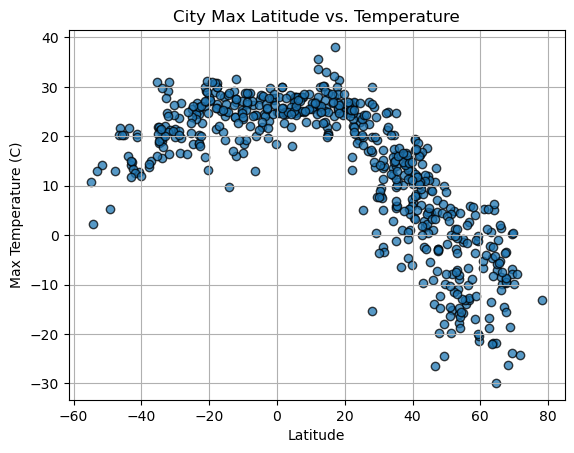

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp"], marker="o", edgecolor='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

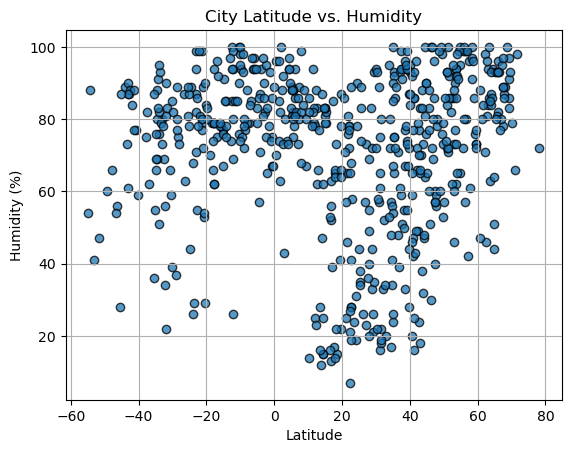

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], marker="o", edgecolor='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

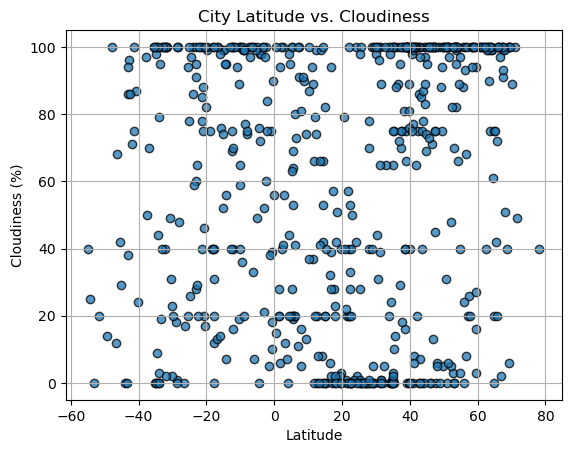

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], marker="o", edgecolor='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

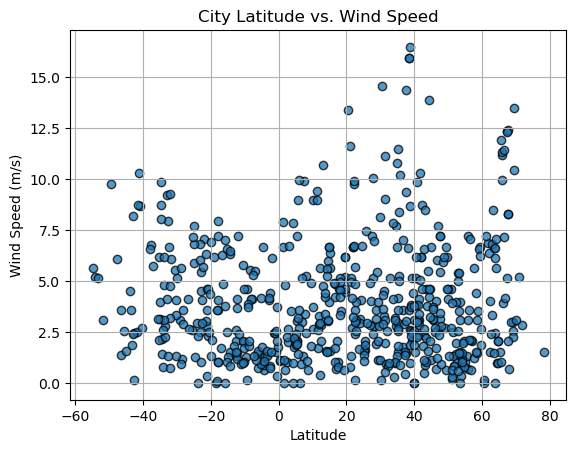

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], marker="o", edgecolor='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    # Calculate regression values
    regress_values = x_values * slope + intercept

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,8.14,86,100,3.09,US,1742078994
7,fuller heights,27.9092,-81.9981,30.06,49,40,5.14,US,1742079000
8,gadzhiyevo,69.2551,33.3362,-6.89,86,100,2.57,RU,1742079001
9,nar'yan-mar,67.6713,53.0870,-9.70,87,99,8.27,RU,1742079002
10,hadibu,12.6500,54.0333,24.93,83,0,2.84,YE,1742079003


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.45,78,78,5.87,PN,1742078993
2,oranjemund,-28.5500,16.4333,16.66,89,1,1.19,NaN,1742078995
3,arraial do cabo,-22.9661,-42.0278,25.22,87,60,5.44,BR,1742078996
4,puerto ayora,-0.7393,-90.3518,27.38,75,39,1.53,EC,1742078997
5,ilebo,-4.3167,20.5833,21.79,87,98,0.61,CD,1742078998


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7319455379434929


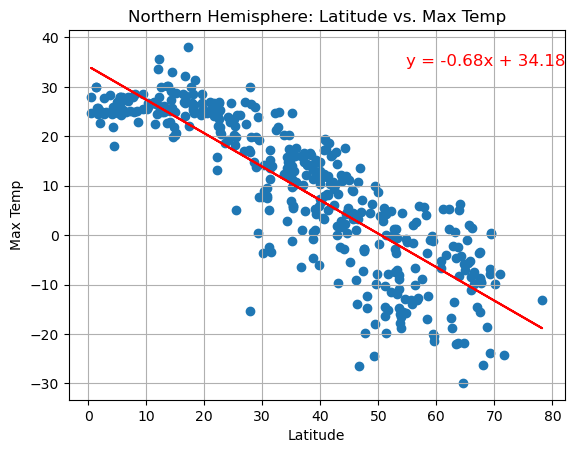

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.30272183025184013


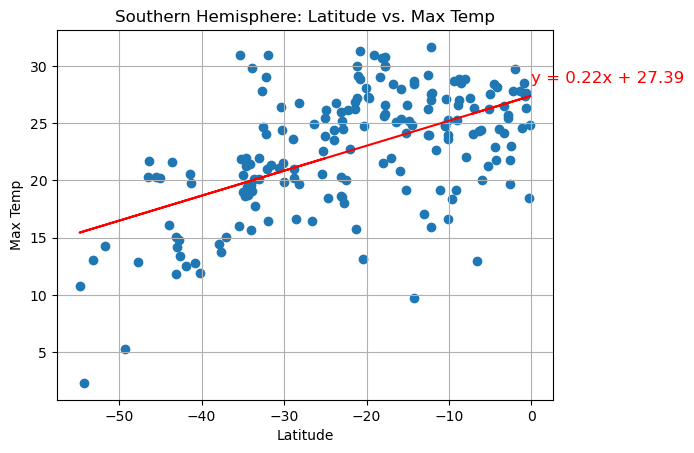

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** There is a slight positive correlation between latitude and maximum temperature in the southern hemisphere (r^2= 0.30, which is below the acceptable threshold of 0.5) and a solid negative correlation between latitude and maximum temperature in the northern hemisphere (r^2= -0.68). 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05057705372258607


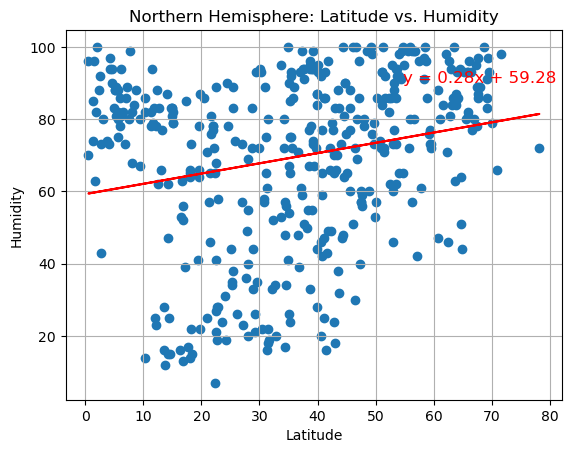

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.10323393363150928


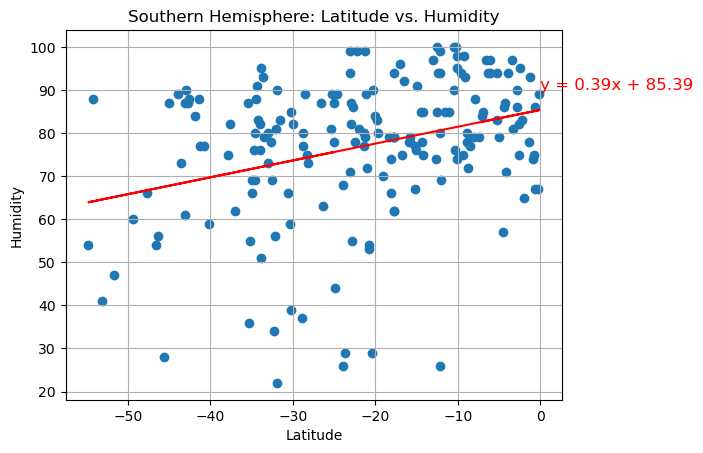

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** The slope of the relationship between humidity and latitude is relatively similar (.28x vs. .39x) between the two hemispheres, however the y-intercept for the southern hemisphere is at 85% whereas the intercept for the x-axis is at 60%, implying the cities selected in the southern hemisphere are generally more humid. This could be due to seasonality (it is summer in the southern hemisphere at the time of this analysis).

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.10839100339260127


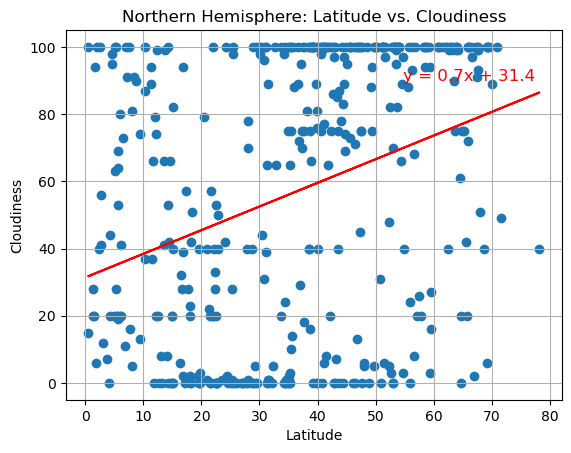

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.03576146582054404


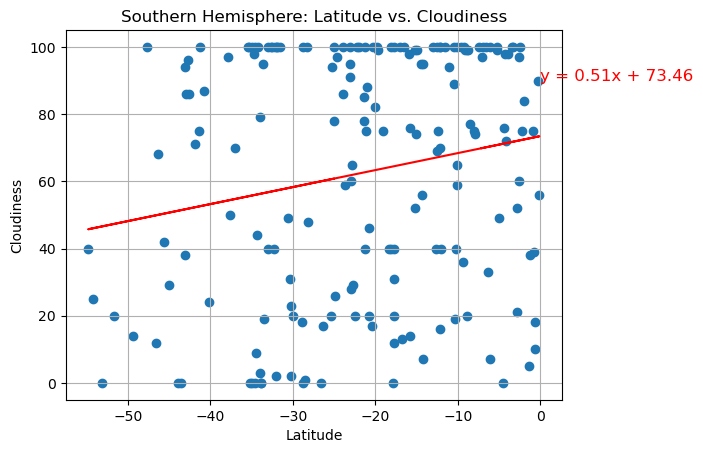

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern have an r^2 value of less than 0.5, indicating cloudiness and latitude do not have a statistically significant correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.003553686473930102


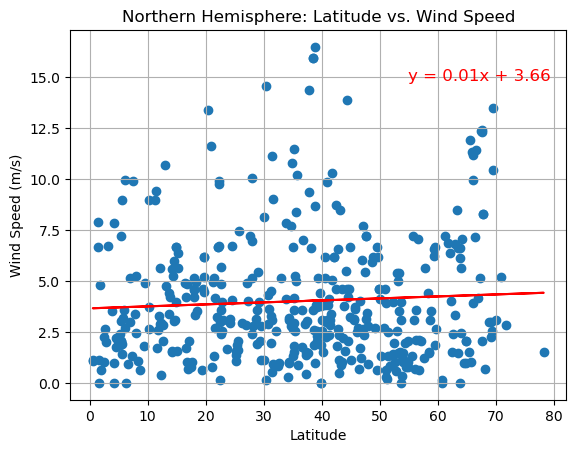

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()


The r^2-value is: 0.10843468626149538


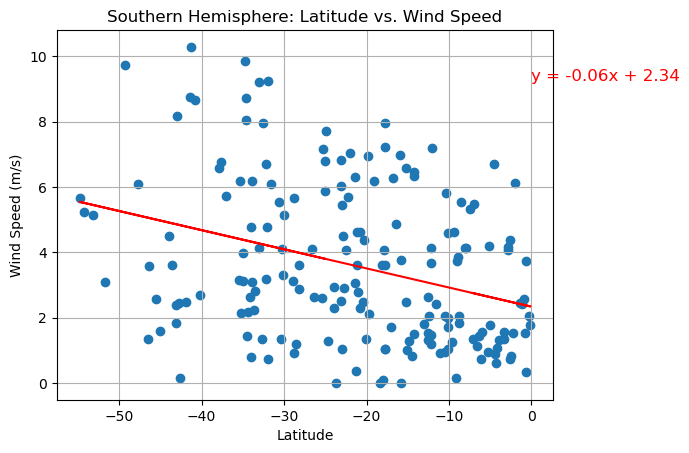

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** The low r^2 value for both hemispheres indicates no statistically significant correlation between latitude and wind speed.